### This notebooks presents steps to replicate the estimated evapotranspiration from example 4 in the HYDRUS tutorial 
Rassam, D., Šimůnek, J., Mallants, D., & van Genuchten, M. T. (2018). The HYDRUS-1D software package for simulating the one-dimensional movement of water, heat, and multiple solutes in variably-saturated media: Tutorial. Riverside: CSIRO Land and Water. 

Author: M. Vremec, University of Graz, 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pyet as et

### Import imput data

In [2]:
meteo = pd.read_csv("data/meteod.csv", parse_dates=True, index_col=0, dayfirst=True)
tmax = meteo.loc[:,"tmax"]
tmin = meteo.loc[:,"tmin"]
rh = meteo.loc[:,"rh"]
wind = meteo.loc[:,"wind"] / 86.4
solar = meteo.loc[:,"solar"]
elevation = 145.93
latitude = -17.94 
lat1 = (latitude-round(latitude))*(5./3.)+round(latitude)
lat2 = lat1 * 3.141592654 / 180.

### Estimate ET with pm1990 as implemented in HYDRUS

In [3]:
pm, radterm, etaero, rnl, rns = et.pm_fao1990(wind, elevation, lat2, solar=solar, tmax=tmax, tmin=tmin, rh=rh, croph=0.6)

### Compare longwave radiation

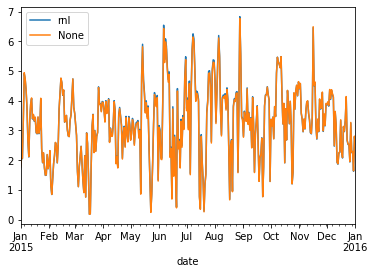

In [4]:
meteo.loc[:,"rnl"].plot()
(rnl).plot()
plt.legend()

### Compare shortwave radiation

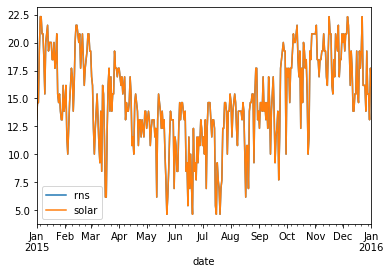

In [5]:
meteo.loc[:,"rns  "].plot()
(rns).plot()
plt.legend()

## Compare aerodynamic term in Penmam-Monteith

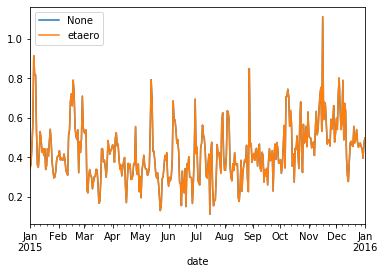

In [6]:
(etaero).plot()
meteo.loc[:,"etaero"].plot()
plt.legend()

## Compare radiation term in Penmam-Monteith

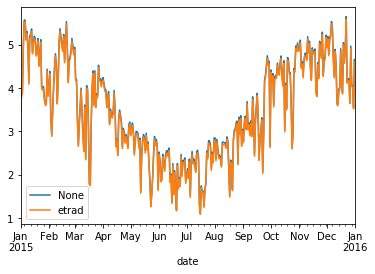

In [7]:
(radterm).plot()
meteo.loc[:,"etrad"].plot()
plt.legend()